In [26]:
import pandas as pd
import numpy as np
import sqlite3
from sqlalchemy import create_engine

In [39]:
import pandas

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#  Enable inline plotting from matplotlib

%matplotlib inline

#  Set some styles for seaborn

sns.set(style="white", color_codes=True)

In [40]:
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy 
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy 
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib 
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas 
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn 
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.9.12 (main, Apr  5 2022, 01:53:17) 
[Clang 12.0.0 ]
scipy: 1.7.3
numpy: 1.21.5
matplotlib: 3.5.1
pandas: 1.4.4
sklearn: 1.0.2


In [27]:
df = pd.read_csv("data/adultdata.csv")

In [28]:
df.describe

<bound method NDFrame.describe of        age           job type      id       degree  yrs employed  \
0       39          State-gov   77516    Bachelors            13   
1       50   Self-emp-not-inc   83311    Bachelors            13   
2       38            Private  215646      HS-grad             9   
3       53            Private  234721         11th             7   
4       28            Private  338409    Bachelors            13   
...    ...                ...     ...          ...           ...   
32556   27            Private  257302   Assoc-acdm            12   
32557   40            Private  154374      HS-grad             9   
32558   58            Private  151910      HS-grad             9   
32559   22            Private  201490      HS-grad             9   
32560   52       Self-emp-inc  287927      HS-grad             9   

            married status          spouse job        fam stat    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1

In [29]:
df.columns

Index(['age', 'job type', 'id', 'degree', 'yrs employed', 'married status',
       'spouse job', 'fam stat', 'race', 'gender', 'col1', 'col2', 'col3',
       'country', 'sal range'],
      dtype='object')

In [30]:
df.shape

(32561, 15)

In [31]:
df

,age,job type,id,degree,yrs employed,married status,spouse job,fam stat,race,gender,col1,col2,col3,country,sal range
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [32]:
df.groupby('degree').max()

,age,job type,id,yrs employed,married status,spouse job,fam stat,race,gender,col1,col2,col3,country,sal range
degree,,,,,,,,,,,,,,
10th,90,State-gov,766115,6,Widowed,Transport-moving,Wife,White,Male,99999,3770,99,Yugoslavia,>50K
11th,90,State-gov,806316,7,Widowed,Transport-moving,Wife,White,Male,14344,2824,99,Vietnam,>50K
12th,79,State-gov,917220,8,Widowed,Transport-moving,Wife,White,Male,18481,2258,99,Vietnam,>50K
1st-4th,90,State-gov,795830,2,Widowed,Transport-moving,Wife,White,Male,7688,2603,96,Vietnam,>50K
5th-6th,84,State-gov,684015,3,Widowed,Transport-moving,Wife,White,Male,7298,2603,84,Vietnam,>50K
7th-8th,90,Without-pay,750972,4,Widowed,Transport-moving,Wife,White,Male,10566,3900,99,Yugoslavia,>50K
9th,90,State-gov,758700,5,Widowed,Transport-moving,Wife,White,Male,99999,2231,99,Yugoslavia,>50K
Assoc-acdm,90,Without-pay,1455435,12,Widowed,Transport-moving,Wife,White,Male,99999,2824,99,Yugoslavia,>50K
Assoc-voc,84,State-gov,1366120,11,Widowed,Transport-moving,Wife,White,Male,99999,2603,99,Yugoslavia,>50K


In [33]:
df.groupby('degree').mean()

,age,id,yrs employed,col1,col2,col3
degree,,,,,,
10th,37.429796,196832.465166,6.0,404.574491,56.845659,37.052519
11th,32.355745,194928.077447,7.0,215.097872,50.079149,33.925957
12th,32.000000,199097.508083,8.0,284.087760,32.337182,35.780600
1st-4th,46.142857,239303.000000,2.0,125.875000,48.327381,38.255952
5th-6th,42.885886,232448.333333,3.0,176.021021,68.252252,38.897898
7th-8th,48.445820,188079.171827,4.0,233.939628,65.668731,39.366873
9th,41.060311,202485.066148,5.0,342.089494,28.998054,38.044747
Assoc-acdm,37.381443,193424.093721,12.0,640.399250,93.418932,40.504217
Assoc-voc,38.553546,181936.016643,11.0,715.051375,72.754703,41.610709


In [34]:
df.groupby('degree').min()

,age,job type,id,yrs employed,married status,spouse job,fam stat,race,gender,col1,col2,col3,country,sal range
degree,,,,,,,,,,,,,,
10th,17,?,21698,6,Divorced,?,Husband,Amer-Indian-Eskimo,Female,0,0,1,?,<=50K
11th,17,?,19752,7,Divorced,?,Husband,Amer-Indian-Eskimo,Female,0,0,2,?,<=50K
12th,17,?,23037,8,Divorced,?,Husband,Amer-Indian-Eskimo,Female,0,0,6,?,<=50K
1st-4th,19,?,34378,2,Divorced,?,Husband,Amer-Indian-Eskimo,Female,0,0,4,?,<=50K
5th-6th,17,?,32896,3,Divorced,?,Husband,Amer-Indian-Eskimo,Female,0,0,3,?,<=50K
7th-8th,17,?,20057,4,Divorced,?,Husband,Amer-Indian-Eskimo,Female,0,0,2,?,<=50K
9th,17,?,22418,5,Divorced,?,Husband,Amer-Indian-Eskimo,Female,0,0,1,?,<=50K
Assoc-acdm,19,?,19302,12,Divorced,?,Husband,Amer-Indian-Eskimo,Female,0,0,1,?,<=50K
Assoc-voc,19,?,20098,11,Divorced,?,Husband,Amer-Indian-Eskimo,Female,0,0,1,?,<=50K


In [35]:
df.groupby('yrs employed').max()

,age,job type,id,degree,married status,spouse job,fam stat,race,gender,col1,col2,col3,country,sal range
yrs employed,,,,,,,,,,,,,,
1,75,State-gov,572751,Preschool,Widowed,Prof-specialty,Wife,White,Male,41310,1719,75,United-States,<=50K
2,90,State-gov,795830,1st-4th,Widowed,Transport-moving,Wife,White,Male,7688,2603,96,Vietnam,>50K
3,84,State-gov,684015,5th-6th,Widowed,Transport-moving,Wife,White,Male,7298,2603,84,Vietnam,>50K
4,90,Without-pay,750972,7th-8th,Widowed,Transport-moving,Wife,White,Male,10566,3900,99,Yugoslavia,>50K
5,90,State-gov,758700,9th,Widowed,Transport-moving,Wife,White,Male,99999,2231,99,Yugoslavia,>50K
6,90,State-gov,766115,10th,Widowed,Transport-moving,Wife,White,Male,99999,3770,99,Yugoslavia,>50K
7,90,State-gov,806316,11th,Widowed,Transport-moving,Wife,White,Male,14344,2824,99,Vietnam,>50K
8,79,State-gov,917220,12th,Widowed,Transport-moving,Wife,White,Male,18481,2258,99,Vietnam,>50K
9,90,Without-pay,1268339,HS-grad,Widowed,Transport-moving,Wife,White,Male,99999,4356,99,Yugoslavia,>50K


In [36]:
df.groupby('yrs employed').min()

,age,job type,id,degree,married status,spouse job,fam stat,race,gender,col1,col2,col3,country,sal range
yrs employed,,,,,,,,,,,,,,
1,19,?,69911,Preschool,Divorced,?,Husband,Asian-Pac-Islander,Female,0,0,10,?,<=50K
2,19,?,34378,1st-4th,Divorced,?,Husband,Amer-Indian-Eskimo,Female,0,0,4,?,<=50K
3,17,?,32896,5th-6th,Divorced,?,Husband,Amer-Indian-Eskimo,Female,0,0,3,?,<=50K
4,17,?,20057,7th-8th,Divorced,?,Husband,Amer-Indian-Eskimo,Female,0,0,2,?,<=50K
5,17,?,22418,9th,Divorced,?,Husband,Amer-Indian-Eskimo,Female,0,0,1,?,<=50K
6,17,?,21698,10th,Divorced,?,Husband,Amer-Indian-Eskimo,Female,0,0,1,?,<=50K
7,17,?,19752,11th,Divorced,?,Husband,Amer-Indian-Eskimo,Female,0,0,2,?,<=50K
8,17,?,23037,12th,Divorced,?,Husband,Amer-Indian-Eskimo,Female,0,0,6,?,<=50K
9,17,?,19214,HS-grad,Divorced,?,Husband,Amer-Indian-Eskimo,Female,0,0,1,?,<=50K


In [37]:
df.groupby('yrs employed').mean()

,age,id,col1,col2,col3
yrs employed,,,,,
1,42.764706,235889.372549,898.392157,66.490196,36.647059
2,46.142857,239303.000000,125.875000,48.327381,38.255952
3,42.885886,232448.333333,176.021021,68.252252,38.897898
4,48.445820,188079.171827,233.939628,65.668731,39.366873
5,41.060311,202485.066148,342.089494,28.998054,38.044747
6,37.429796,196832.465166,404.574491,56.845659,37.052519
7,32.355745,194928.077447,215.097872,50.079149,33.925957
8,32.000000,199097.508083,284.087760,32.337182,35.780600
9,38.974479,189538.739739,576.800114,70.466622,40.575374


In [42]:
df.groupby('sal range').mean()

,age,id,yrs employed,col1,col2,col3
sal range,,,,,,
<=50K,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210
>50K,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026


In [43]:
df.groupby('yrs employed').max()

,age,job type,id,degree,married status,spouse job,fam stat,race,gender,col1,col2,col3,country,sal range
yrs employed,,,,,,,,,,,,,,
1,75,State-gov,572751,Preschool,Widowed,Prof-specialty,Wife,White,Male,41310,1719,75,United-States,<=50K
2,90,State-gov,795830,1st-4th,Widowed,Transport-moving,Wife,White,Male,7688,2603,96,Vietnam,>50K
3,84,State-gov,684015,5th-6th,Widowed,Transport-moving,Wife,White,Male,7298,2603,84,Vietnam,>50K
4,90,Without-pay,750972,7th-8th,Widowed,Transport-moving,Wife,White,Male,10566,3900,99,Yugoslavia,>50K
5,90,State-gov,758700,9th,Widowed,Transport-moving,Wife,White,Male,99999,2231,99,Yugoslavia,>50K
6,90,State-gov,766115,10th,Widowed,Transport-moving,Wife,White,Male,99999,3770,99,Yugoslavia,>50K
7,90,State-gov,806316,11th,Widowed,Transport-moving,Wife,White,Male,14344,2824,99,Vietnam,>50K
8,79,State-gov,917220,12th,Widowed,Transport-moving,Wife,White,Male,18481,2258,99,Vietnam,>50K
9,90,Without-pay,1268339,HS-grad,Widowed,Transport-moving,Wife,White,Male,99999,4356,99,Yugoslavia,>50K


In [44]:
df.groupby('yrs employed').min()

,age,job type,id,degree,married status,spouse job,fam stat,race,gender,col1,col2,col3,country,sal range
yrs employed,,,,,,,,,,,,,,
1,19,?,69911,Preschool,Divorced,?,Husband,Asian-Pac-Islander,Female,0,0,10,?,<=50K
2,19,?,34378,1st-4th,Divorced,?,Husband,Amer-Indian-Eskimo,Female,0,0,4,?,<=50K
3,17,?,32896,5th-6th,Divorced,?,Husband,Amer-Indian-Eskimo,Female,0,0,3,?,<=50K
4,17,?,20057,7th-8th,Divorced,?,Husband,Amer-Indian-Eskimo,Female,0,0,2,?,<=50K
5,17,?,22418,9th,Divorced,?,Husband,Amer-Indian-Eskimo,Female,0,0,1,?,<=50K
6,17,?,21698,10th,Divorced,?,Husband,Amer-Indian-Eskimo,Female,0,0,1,?,<=50K
7,17,?,19752,11th,Divorced,?,Husband,Amer-Indian-Eskimo,Female,0,0,2,?,<=50K
8,17,?,23037,12th,Divorced,?,Husband,Amer-Indian-Eskimo,Female,0,0,6,?,<=50K
9,17,?,19214,HS-grad,Divorced,?,Husband,Amer-Indian-Eskimo,Female,0,0,1,?,<=50K


In [48]:
df_adult = adult.explode("gender")

NameError: name 'adult' is not defined

In [45]:
df.dtypes

age                int64
job type          object
id                 int64
degree            object
yrs employed       int64
married status    object
spouse job        object
fam stat          object
race              object
gender            object
col1               int64
col2               int64
col3               int64
country           object
sal range         object
dtype: object

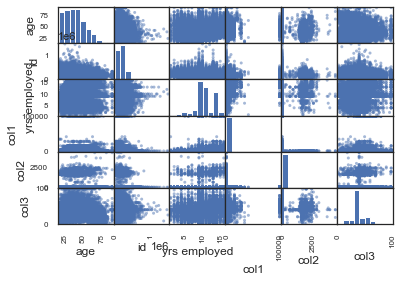

In [47]:
scatter_matrix(df)
plt.show()